In [9]:
import os
import sys
from tqdm import tqdm  

from datetime import datetime

import torch
import random

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# import pandas
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np


import gc
import torch
import torchvision
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torchvision.utils import make_grid

from jutils import denorm
from jutils import ims_to_grid
from jutils.vision import tensor2im
from jutils import tensor2im, ims_to_grid

while not os.path.exists('ldm'):
    %cd ..
assert os.path.exists('ldm')


from data_processing.tools.norm import denorm_tensor
from ldm.trainer_bvae_ti2 import TrainerModuleLatentBetaVae
from ldm.dataloader.dataloader.hdf5_dataloader import HDF5DataModule

DEV = "cuda:0" if torch.cuda.is_available() else "cpu"
torch.cuda.empty_cache()
gc.collect()

print(f"Memory Allocated: {torch.cuda.memory_allocated(DEV) / 1024 ** 3:.2f} GB")
print(f"Memory Cached: {torch.cuda.memory_reserved(DEV) / 1024 ** 3:.2f} GB")

Memory Allocated: 0.00 GB
Memory Cached: 0.00 GB


2025-06-30 23:51:20,587 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-30 23:51:20,590 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-30 23:51:20,652 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-30 23:51:20,653 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-30 23:51:20,654 - INFO - Using categorical units to plot a list of strings that are all parsable as 

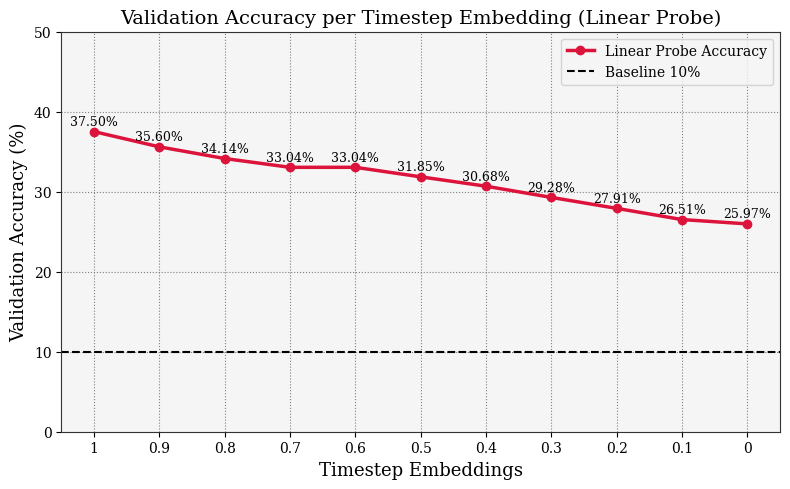

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create DataFrame
data = {
    "Timestep": ["0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1"],
    "Accuracy": [25.97, 26.51, 27.91, 29.28, 30.68, 31.85, 33.04, 33.04, 34.14, 35.60, 37.50]
}
df = pd.DataFrame(data)

# Reverse order
timesteps = list(df["Timestep"])[::-1]
acc = np.array(df["Accuracy"])[::-1]

# Style
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Cambria", "Times New Roman", "DejaVu Serif"]
plt.rcParams["axes.facecolor"] = "#f5f5f5"
plt.rcParams["axes.edgecolor"] = "#333333"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.color"] = "grey"
plt.rcParams["axes.grid"] = True


fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(timesteps, acc, color="crimson", marker='o', linewidth=2.5, label="Linear Probe Accuracy")

ax.axhline(y=10, color='black', linestyle='--', linewidth=1.5, label="Baseline 10%")

for i, val in enumerate(acc):
    ax.text(timesteps[i], val + 0.8, f"{val:.2f}%", ha='center', fontsize=9)

ax.set_title("Validation Accuracy per Timestep Embedding (Linear Probe)", fontsize=14)
ax.set_xlabel("Timestep Embeddings", fontsize=13)
ax.set_ylabel("Validation Accuracy (%)", fontsize=13)
ax.set_ylim(0, 50)  # normal y-axis range

ax.legend()
fig.tight_layout()
plt.show()


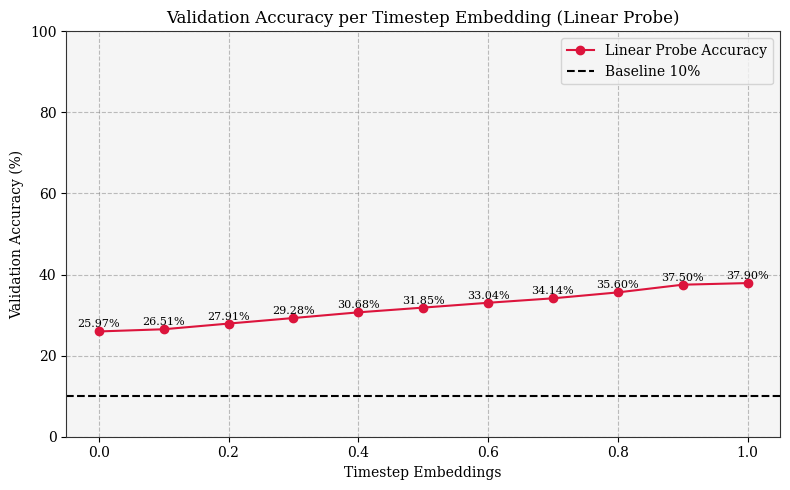

In [11]:
import matplotlib.pyplot as plt

# Example data (replace with your real data)
timesteps = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
acc_values = [25.97, 26.51, 27.91, 29.28, 30.68, 31.85, 33.04, 34.14, 35.60, 37.50, 37.90]

# Create figure
plt.figure(figsize=(8, 5))

# Plot your accuracy curve
plt.plot(timesteps, acc_values, label="Linear Probe Accuracy", color="crimson", marker="o")

# Add horizontal dashed black baseline at 10%
plt.axhline(y=10, color='black', linestyle='--', linewidth=1.5, label="Baseline 10%")

# Add value annotations on each point
for x, y in zip(timesteps, acc_values):
    plt.text(x, y + 0.5, f"{y:.2f}%", ha='center', va='bottom', fontsize=8)

# Axis labels
plt.xlabel("Timestep Embeddings")
plt.ylabel("Validation Accuracy (%)")
plt.ylim([0, 100])

# Title
plt.title("Validation Accuracy per Timestep Embedding (Linear Probe)")

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show
plt.tight_layout()
plt.show()
